Setup and Data Loading

In [ ]:

import os
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.pyplot import figure, show, savefig

results_dir = '../results'
plots_dir = '../plots'
os.makedirs(plots_dir, exist_ok=True)

# Load CSVs
score_files = glob.glob(os.path.join(results_dir, "*_scores.csv"))
scores = {}
for file in score_files:
    name = os.path.basename(file).replace("_scores.csv", "")
    df = pd.read_csv(file)
    scores[name] = df['score']
print(scores)

{'Multiples+': 0       118
1        92
2       164
3        99
4       200
       ... 
9995     77
9996    193
9997    157
9998    123
9999    129
Name: score, Length: 10000, dtype: int64, 'Multiples': 0       123
1       125
2       145
3       160
4       180
       ... 
9995    149
9996    145
9997    182
9998    143
9999    157
Name: score, Length: 10000, dtype: int64, 'Straights': 0       101
1       140
2       115
3       181
4       138
       ... 
9995     81
9996    173
9997    109
9998    129
9999    129
Name: score, Length: 10000, dtype: int64, 'Tunnel Vision': 0       175
1       189
2       162
3       188
4       171
       ... 
9995    177
9996    157
9997    120
9998    189
9999    161
Name: score, Length: 10000, dtype: int64, 'Upper Focus': 0       121
1       107
2        97
3       136
4        91
       ... 
9995    104
9996     78
9997    118
9998     65
9999     77
Name: score, Length: 10000, dtype: int64, 'Yahtzee Focus': 0       162
1        73
2       118
3   

In [10]:
import os
print("Current working dir:", os.getcwd())

Current working dir: c:\Users\kevin\Documents\Github\Yahtzee_Sim_Final\analysis


Summary Statistics

In [11]:
summary = []
for name, data in scores.items():
    mean = round(data.mean(), 2)
    median = data.median()
    std = round(data.std(), 2)
    ci = round(1.96 * std / math.sqrt(len(data)), 2)
    summary.append({
        "Strategy": name,
        "Mean": mean,
        "Median": median,
        "Std Dev": std,
        "Min": data.min(),
        "Max": data.max(),
        "95% CI": ci
    })
summary_df = pd.DataFrame(summary).sort_values("Mean", ascending=False)
summary_df

,Strategy,Mean,Median,Std Dev,Min,Max,95% CI
3,Tunnel Vision,168.08,165.0,38.00,69,320,0.74
0,Multiples+,140.49,140.0,35.30,33,276,0.69
1,Multiples,140.36,138.0,35.82,39,288,0.70
2,Straights,139.86,138.0,35.65,43,280,0.70
5,Yahtzee Focus,107.72,105.0,29.50,31,246,0.58
4,Upper Focus,98.88,95.0,29.87,37,237,0.59


Histogram and Boxplots

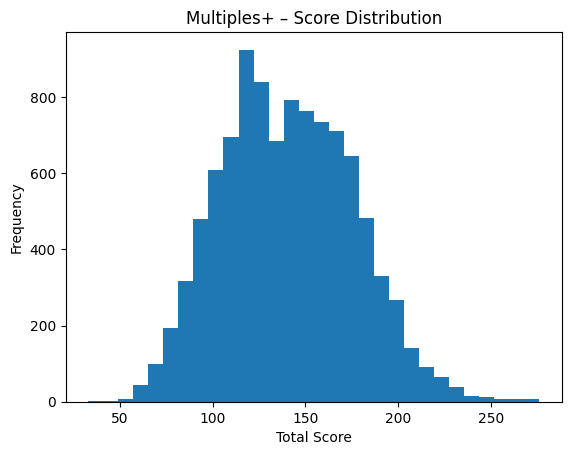

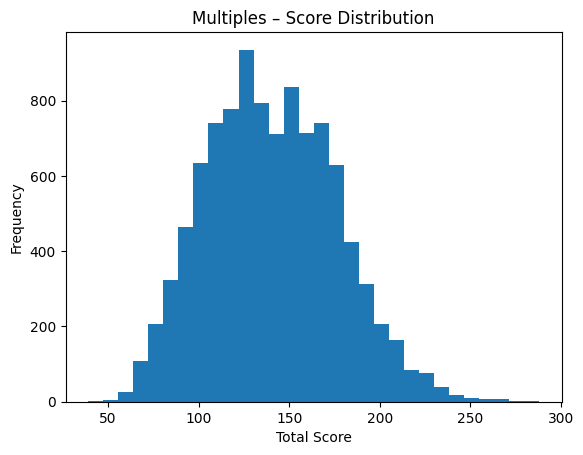

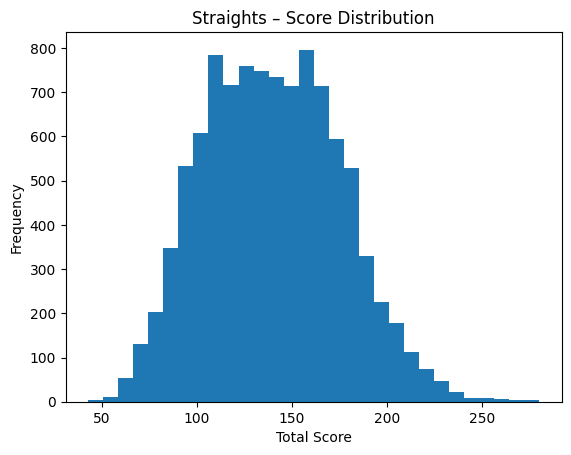

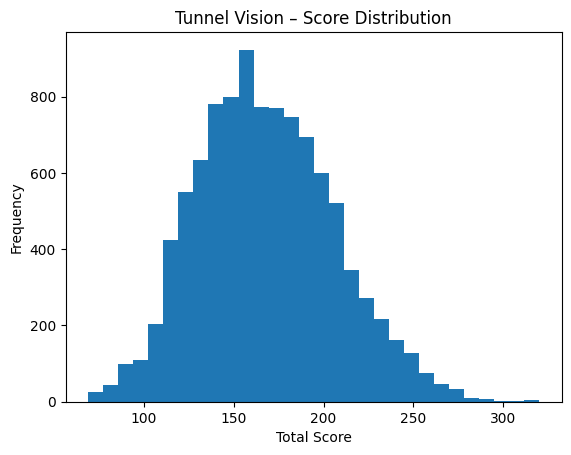

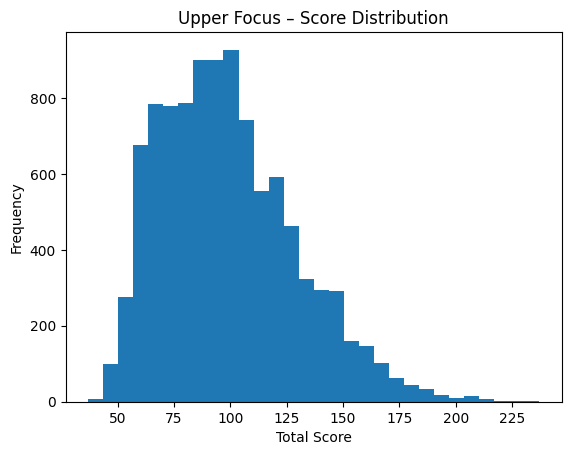

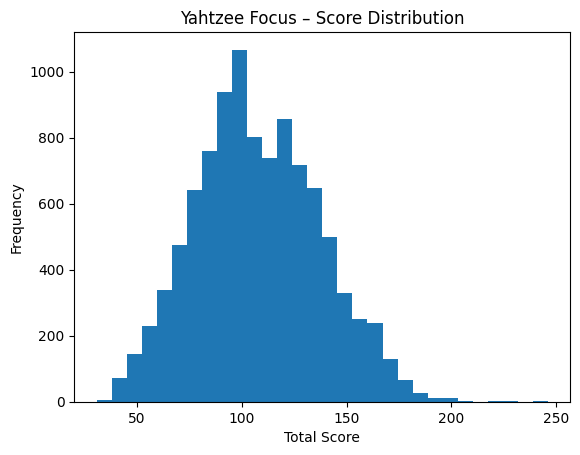

C:\Users\kevin\AppData\Local\Temp\ipykernel_60208\3137271001.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores.values(), labels=scores.keys())


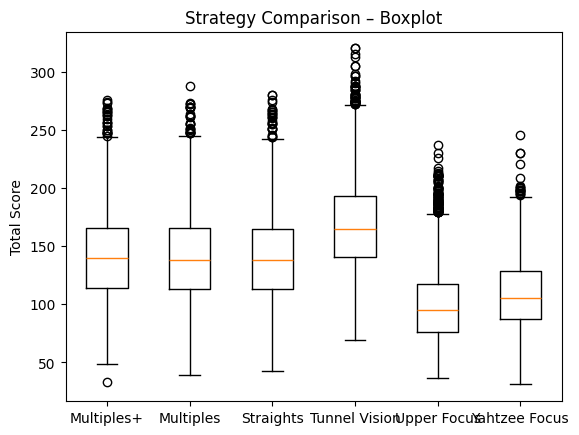

In [ ]:
for name, data in scores.items():
    plt.figure()
    plt.hist(data, bins=30)
    plt.title(f"{name} – Score Distribution")
    plt.xlabel("Total Score")
    plt.ylabel("Frequency")
    plt.show()

Box Plot

C:\Users\kevin\AppData\Local\Temp\ipykernel_60208\3012771211.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores.values(), labels=scores.keys())


NameError: name 'figure' is not defined

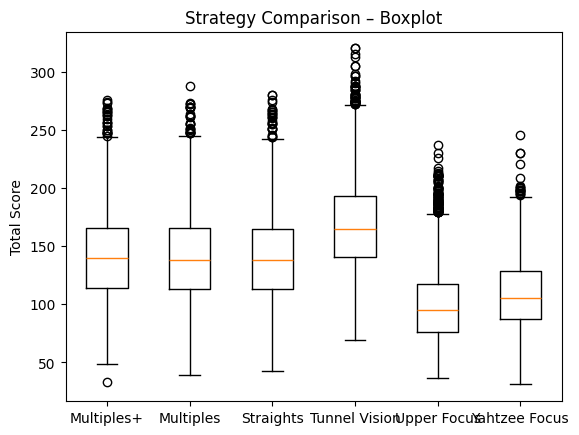

In [19]:
plt.figure()
plt.boxplot(scores.values(), labels=scores.keys())
plt.title("Strategy Comparison – Boxplot")
plt.ylabel("Total Score")
figure(figsize=(8, 6), dpi=80)
plt.show()

Pairwise t-Tests

In [14]:
print("Pairwise t-tests (p-values):")
names = list(scores.keys())
for i in range(len(names)):
    for j in range(i + 1, len(names)):
        s1, s2 = names[i], names[j]
        _, p = ttest_ind(scores[s1], scores[s2], equal_var=False)
        print(f"{s1} vs {s2}: p = {p:.4g}")

Pairwise t-tests (p-values):
Multiples+ vs Multiples: p = 0.7868
Multiples+ vs Straights: p = 0.2074
Multiples+ vs Tunnel Vision: p = 0
Multiples+ vs Upper Focus: p = 0
Multiples+ vs Yahtzee Focus: p = 0
Multiples vs Straights: p = 0.3259
Multiples vs Tunnel Vision: p = 0
Multiples vs Upper Focus: p = 0
Multiples vs Yahtzee Focus: p = 0
Straights vs Tunnel Vision: p = 0
Straights vs Upper Focus: p = 0
Straights vs Yahtzee Focus: p = 0
Tunnel Vision vs Upper Focus: p = 0
Tunnel Vision vs Yahtzee Focus: p = 0
Upper Focus vs Yahtzee Focus: p = 1.676e-97


Cohen's d

In [8]:
print("\nCohen's d (effect size vs Dice-Driven):")
base = "Dice-Driven"
for other in scores:
    if other != base:
        m1, m2 = scores[base].mean(), scores[other].mean()
        s1, s2 = scores[base].std(), scores[other].std()
        pooled_std = ((s1**2 + s2**2) / 2)**0.5
        d = (m1 - m2) / pooled_std
        print(f"{base} vs {other}: d = {d:.2f}")


Cohen's d (effect size vs Dice-Driven):


KeyError: 'Dice-Driven'